In [8]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import GradientBoostingRegressor
np.set_printoptions(threshold=np.nan)

In [17]:
df = pd.read_csv("precos_casa_california.csv") # Importa aquivo.CSV
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.25,37.85,52.0,919.0,,413.0,,4.0368,269700.0,NEAR BAY
2,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
3,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
4,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY


In [20]:
NVL_Linhas = df.dropna(axis="rows") # Deleta linhas nulas

NVL_Linhas = NVL_Linhas.replace('INLAND', 0) # Substitui 'INLAND' por 0 em ocean_proximity
NVL_Linhas = NVL_Linhas.replace('<1H OCEAN', 1) # Substitui '<1H OCEAN' por 1 em ocean_proximity
NVL_Linhas = NVL_Linhas.replace('NEAR BAY', 2) # Substitui 'NEAR BAY' por 2 em ocean_proximity
NVL_Linhas = NVL_Linhas.replace('NEAR OCEAN', 3) # Substitui 'NEAR OCEAN' por 3 em ocean_proximity
NVL_Linhas = NVL_Linhas.replace('ISLAND', 4) # Substitui 'ISLAND' por 4 em ocean_proximity

cols = NVL_Linhas.columns
NVL_Linhas[cols] = NVL_Linhas[cols].apply(pd.to_numeric, errors='coerce')# Transforma colunas para numérico, a não ser que seja texto(erro)

NVL_Linhas = NVL_Linhas.drop(columns=['latitude', 'longitude']) #dropa as colunas que não serão usadas

NVL_Linhas.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2.0
1,52.0,919.0,NaN,413.0,NaN,4.0368,269700.0,2.0
2,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,2.0
3,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,2.0
4,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,2.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13932 entries, 4 to 20443
Data columns (total 8 columns):
housing_median_age    13932 non-null float64
total_rooms           13932 non-null float64
total_bedrooms        13932 non-null float64
population            13932 non-null float64
households            13932 non-null float64
median_income         13932 non-null float64
median_house_value    13932 non-null float64
ocean_proximity       13932 non-null float64
dtypes: float64(8)
memory usage: 979.6 KB


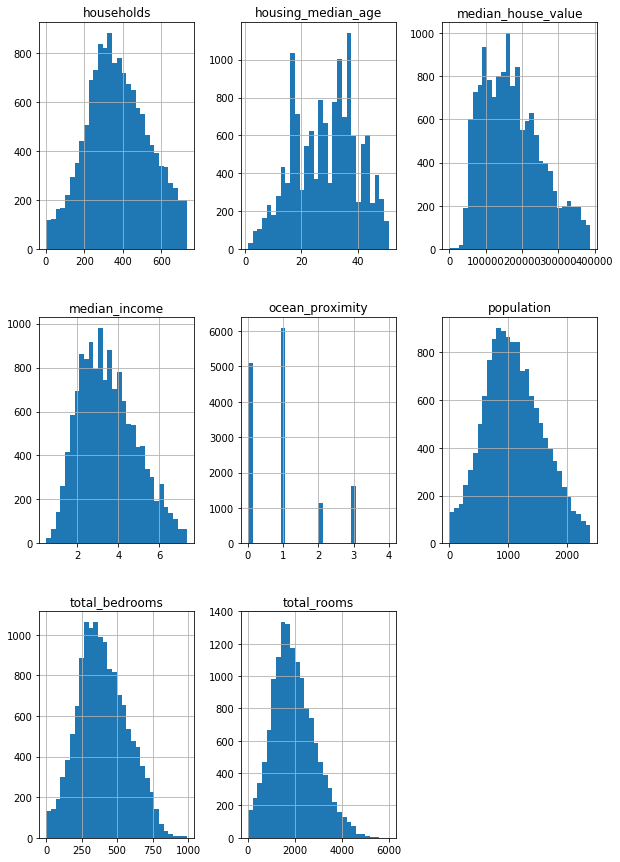

Score: 0.609395202900098


In [19]:
cleanCols = NVL_Linhas.columns[:7]
for i in cleanCols:
  NVL_Linhas = NVL_Linhas.loc[NVL_Linhas[i] < NVL_Linhas[i].quantile(0.95)]
NVL_Linhas.info()

%matplotlib inline
import matplotlib.pyplot as plt
NVL_Linhas.hist(bins=30, figsize=(10,15))
plt.show()

#tira o valor das casas para criar a variável de treino
treino = NVL_Linhas.drop(columns=['median_house_value'])

treino.head()

x = treino
y = NVL_Linhas['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

# Cria regressor linear
regr = GradientBoostingRegressor()

# Traça modelo
model = regr.fit(x_train, y_train)

# score
score = model.score(x_test, y_test)
print('Score: ' + str(score))